# Домашнее задание 6: классификация текстов

В этом домашнем задании вам предстоит построить классификатор текстов и поучаствовать в соревновании на Kaggle!
Первым делом вам предстоит построить хороший бейзлайн, а дальше пытаться улучшать, соревнуясь с другими участниками.


Ссылка на соревнование: https://www.kaggle.com/c/avito-category-prediction/overview
Данные для домашнего задания можно скачать на странице соревнования.
Чтобы ваше участие было засчитано, убедитесь, что имя в Leaderboard имеет вид: «Имя Фамилия номер_группы».

Оценивание:

Домашнее задание оценивается как обычно. Баллы указаны напротив заданий.

За соревнование даются бонусные баллы следующим образом.
Если вы пересекли baseline_2 на приватном лидерборде, ваша оценка равна 

10 - 10 * (i - 1) / M

где M — количество студентов, принявших участие в соревновании;

i — место (начиная с 1) студента в приватном лидерборде среди всех таких студентов.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

* В течение 3 суток после окончания соревнования в соответствующее задание на anytask необходимо прислать код, воспроизводящий ответы для посылки, фигурирующей в приватном лидерборде. В случае отсутствия кода, воспроизводящего результат, в установленный срок студенту выставляется 0 в качестве оценки за соревнование. Если не оговорено иное, использовать любые внешние данные в соревнованиях '''запрещено'''. Под внешними данными понимаются размеченные данные, где разметка имеет прямое отношение к решаемой задаче. Грубо говоря, сборник текстов с википедии не считается внешними данными.


Мы будем работать с датасетом объявлений Avito. Нам предстоит по заголовку и тексту объявления предсказывать категорию объявления.

In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('avito-text-classification/train_100k.csv')
test = pd.read_csv('avito-text-classification/test.csv')

In [3]:
train.head()

,Unnamed: 0,title,description,Category_name,Category
0,0,"Эбу Renault / Nissan 1,5 DCI Delphi 2001-2008 год","Комплект ЭБУ (мозги, компьютер мотора, двигате...",Запчасти и аксессуары,10
1,1,Утюг утп 1000 ватт СССР 1987 год,Продам/\n Фото № 1-2 /\n /\nУтюг УТП 1000 ватт...,Бытовая техника,21
2,2,Возвму машину с выкупом,Возьму машину в аренду с последующим выкупом н...,Предложение услуг,114
3,3,Полусапожки,"полусапожки в отличном состоянии, один раз оде...","Одежда, обувь, аксессуары",27
4,4,Босоножки кожаные,"Кожаные(натур) босоножки Karlo Pasolini, 40 рр...","Одежда, обувь, аксессуары",27


## Задание 1 (0.5 балла)

Выведете на экран информацию о пропусках в данных. Если пропуски присутствуют заполните их пустой строкой.

In [4]:
pd.isnull(train).sum ()
train = train.fillna('')

In [5]:
pd.isnull (test).sum()
test = test.fillna('')

## Задание 2 (0.5 балла)
Сконкатенируйте заголовок и описание в единую строку и поместите результат в отдельный столбец. Таким образом мы будет работать с одним текстом, а не с двумя.

In [6]:
train ['tit+descr'] = train ['title'].str.cat(train['description'], sep =" ")
train.head()

,Unnamed: 0,title,description,Category_name,Category,tit+descr
0,0,"Эбу Renault / Nissan 1,5 DCI Delphi 2001-2008 год","Комплект ЭБУ (мозги, компьютер мотора, двигате...",Запчасти и аксессуары,10,"Эбу Renault / Nissan 1,5 DCI Delphi 2001-2008 ..."
1,1,Утюг утп 1000 ватт СССР 1987 год,Продам/\n Фото № 1-2 /\n /\nУтюг УТП 1000 ватт...,Бытовая техника,21,Утюг утп 1000 ватт СССР 1987 год Продам/\n Фот...
2,2,Возвму машину с выкупом,Возьму машину в аренду с последующим выкупом н...,Предложение услуг,114,Возвму машину с выкупом Возьму машину в аренду...
3,3,Полусапожки,"полусапожки в отличном состоянии, один раз оде...","Одежда, обувь, аксессуары",27,"Полусапожки полусапожки в отличном состоянии, ..."
4,4,Босоножки кожаные,"Кожаные(натур) босоножки Karlo Pasolini, 40 рр...","Одежда, обувь, аксессуары",27,Босоножки кожаные Кожаные(натур) босоножки Kar...


## Задание 3 (0.5 балла)
Давайте немного посмотрим на наши данные. Визуализируйте (где явно просят) или выведете информацию о следующем:

1. Сколько всего уникальных классов необходимо предсказать?
2. Постройте столбчатую диаграмму распределения по классам. Нормализуйте график, чтобы видеть доли, а не абсолютные значения.
3. На сколько большой дисбаланс? Какой класс имеет самую большую долю в выборке (укажите класс и долю), какой класс наименьшую (укажите класс и долю).

In [7]:
#1 — исходя из данных — 50 классов
len (train ['Category'].unique())

50

In [8]:
train ['Category_name'].value_counts()

Одежда, обувь, аксессуары       18066
Запчасти и аксессуары           17418
Детская одежда и обувь          13540
Товары для детей и игрушки       4975
Мебель и интерьер                3661
Квартиры                         3462
Ремонт и строительство           3285
Автомобили                       3060
Предложение услуг                2870
Телефоны                         2659
Коллекционирование               2425
Спорт и отдых                    2015
Аудио и видео                    1933
Красота и здоровье               1714
Бытовая техника                  1673
Товары для компьютера            1616
Часы и украшения                 1400
Книги и журналы                  1384
Дома, дачи, коттеджи             1127
Посуда и товары для кухни         985
Оборудование для бизнеса          741
Земельные участки                 635
Вакансии                          626
Фототехника                       617
Игры, приставки и программы       598
Растения                          530
Коммерческая

In [9]:
#3 — самый большой класс — Одежда, обувь, аксессуары, его доля:
max (train ['Category_name'].value_counts())/sum(train ['Category_name'].value_counts())

0.18066

In [10]:
# самый маленький класс — недвижимость за рубежом, его доля. Дисбаланс классов существенный:
min (train ['Category_name'].value_counts())/sum(train ['Category_name'].value_counts())

3e-05

<BarContainer object of 50 artists>

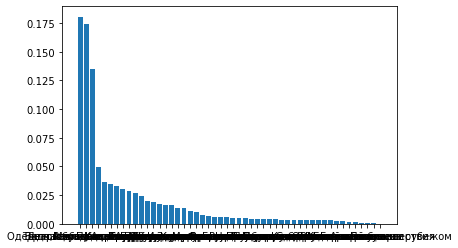

In [94]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.bar (train ['Category_name'].value_counts().to_frame().reset_index()['index'], (train ['Category_name'].value_counts())/sum(train ['Category_name'].value_counts()))

## Задание 4 (0.5 балла)

Далее мы будем пока работать только с train частью. Для test части нам неизвестны истинные значения, и они понадобятся только тогда, когда мы будем отправлять решение на Kaggle.

1. Предобработайте данные (train часть) с помощью CountVectorizer.
2. Какого размера получилась матрица?


In [12]:
from sklearn.feature_extraction.text import CountVectorizer
cnt_vec = CountVectorizer()
X = cnt_vec.fit_transform(train ['tit+descr'])
X.shape

(100000, 230691)

## Задание 5 (0.5 балла)

В предыдущем пункте у вас должная была получится очень большая матрица. Это не дело.
Если вы взгляните на текст, то увидете, что там есть множество специальных символов.

Давайте также посмотрим на словарь, который получился в результате построения CountVectorizer, его можно найти в поле _vocabulary инстанса этого класса.

1. Найдите в этом словаре все слова, которые начинаются на цифру. Сколько таких слов нашлось?

2. Найдите все слова, которые начинаются на символы пунктуации. Сколько таких слов нашлось? 

In [13]:
vocab = list (cnt_vec.vocabulary_.keys())
cnt_num = 0
for word in vocab:
    if word.startswith (('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')):
        cnt_num +=1
print (cnt_num)


33397


In [14]:
cnt_punkt = 0
for word in vocab:
    if word[0] in '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~':
        cnt_punkt +=1
print (cnt_punkt)

168


## Задание 6 (2.5 балла)

В scikit-learn мы можем оценивать процесс подсчета матрицы через CountVectorizer. У CountVectorizer, как и у других наследников \_VectorizerMixin, есть аргумент tokenizer и preprocessor. preprocessor применится в самом начале к каждой строке вашего датасета, tokenizer же должен принять строку и вернуть токены.
Давайте напишем кастомный токенайзер, которые сделает все, что нам нужно: 

0. Приведет все буквы к нижнему регистру
1. Разобьет текст на токены с помощью word_tokenizer из пакета nltk
2. Удалит все токены содержащие числа и пунктуацию
3. Удалит все токены, которые перечислены в nltk.corpus.stopwords('russian')
4. Проведет стемминг с помощью SnowballStemmer

Продемонстрируйте работу вашей функии на самом первом описании товара в датасете.

Важно: так как функию будет необходимо запускать на большом корпусе, подумайте об эффективной реализации. Постарайтесь решить задачу в минимальное количество циклов и копирований.

Референсная реализация на компьютере автора работала 230 секунд на 100к строчек.

In [62]:
from string import punctuation
punctuation
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
def myTokenizer (data):
    a = word_tokenize(data.lower())
    clear = []
    for word in a:
        if word not in stopwords.words('russian') and word.isalpha()==True:
            clear.append (word)
    st = SnowballStemmer('russian')
    clear = [st.stem(word) for word in clear]
    return clear

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\79150\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\79150\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [63]:
data = train['tit+descr'][0]
myTokenizer (data)

['эб',
 'renault',
 'nissan',
 'dci',
 'delphi',
 'год',
 'комплект',
 'эб',
 'мозг',
 'компьютер',
 'мотор',
 'двигател',
 'коммутатор',
 'электрон',
 'блок',
 'управлен',
 'двигател',
 'компьютер',
 'мотор',
 'рен',
 'kangoo',
 'канг',
 'канг',
 'мега',
 'сценик',
 'laguna',
 'лагун',
 'clio',
 'кли',
 'nissan',
 'micra',
 'нисса',
 'микр',
 'друг',
 'рен',
 'нисса',
 'дизел',
 'топливн',
 'аппаратур',
 'делф',
 'оригина',
 'отличн',
 'состоян',
 'проверен',
 'гарант',
 'запчаст',
 'предоставля',
 'гарант',
 'возможн',
 'установк',
 'подробн',
 'раздел',
 'компан',
 'дорож',
 'сво',
 'репутац',
 'торгу',
 'легальн',
 'контрактн',
 'запчаст',
 'дета',
 'налич',
 'таможен',
 'документ',
 'запчаст',
 'автомобил',
 'пробег',
 'росс',
 'отправля',
 'друг',
 'регион',
 'таможен',
 'союз',
 'транспортн',
 'компан',
 'наложн',
 'платеж']

## Задание 7 (1 балл)

1. Возьмите случайные 500к строк из датасета. Постройте по ним CountVectorizer с применением вашего токенизатора.
2. Разбейте полученную матрицу на train, test в отношении 4 к 1. Не забудьте про target переменную.
3. Обучите SGDClassifier на полученной выборке.
4. Посчитайте метрику accuracy

In [101]:
myCV = CountVectorizer (tokenizer= myTokenizer)
from sklearn.model_selection import train_test_split
X_tr, X_te, y_tr, y_te = train_test_split(np.array (train ['tit+descr']), np.array (train['Category']), train_size = 0.8, test_size = 0.2)
X_tr_v = myCV.fit_transform(X_tr)
from sklearn.linear_model import SGDClassifier
sg = SGDClassifier ()
sg.fit(X_tr_v, y_tr)
X_te_v = myCV.transform(X_te)
sg_preds =sg.predict(X_te_v)
from sklearn.metrics import accuracy_score
accuracy_score(y_te, sg_preds)

0.82455

## Задание 8 (1 балл)

1. Повторите 7 задание, но с tf-idf векторизатором. Как изменилось качество.
2. Мы можем еще сильнее уменьшите размер нашей матрицы, если отбросим значения df близкие к единице. Скорее всего такие слова не несут много информации о категории, так как встречаются достаточно часто. Ограничьте максимальный df в параметрах TfIdfVectorizer, поставьте верхнюю границу равную 0.9. Как изменился размер матрицы, как изменилось качество?


In [103]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(tokenizer = myTokenizer)
X_tr_tf = tfidf.fit_transform(X_tr)
sg2 = SGDClassifier ()
sg2.fit(X_tr_tf, y_tr)
X_te_tf = tfidf.transform(X_te)
sg2_preds =sg2.predict(X_te_tf)
accuracy_score(y_te, sg2_preds)

0.8269

In [105]:
tfidf2 = TfidfVectorizer(tokenizer = myTokenizer, max_df=0.9)
X_tr_tf2 = tfidf2.fit_transform(X_tr)
sg3 = SGDClassifier ()
sg3.fit(X_tr_tf2, y_tr)
X_te_tf2 = tfidf2.transform(X_te)
sg3_preds =sg3.predict(X_te_tf2)
accuracy_score(y_te, sg3_preds)

0.82655

In [109]:
X_tr_tf.shape, X_tr_tf2.shape, X_tr_v.shape #Матрица не изменилась, точность чуть-чуть сниизилась

((80000, 74608), (80000, 74608), (80000, 74608))

## Задание 9 (1 балл)
Еще один популяпный трюк, который позволит уменьшить количество признаков называется hashing trick. Его суть в том, то мы случайно группируем признаки ииии  ..... складываем их! А потом удаляем исходные признаки. В итоге все наши признаки это просто суммы исходных. Звучит странно, но это отлично работает. Давайте проверим этот трюк в нашем сеттинге.
Также при таком подходе вам не нужно хранить словарь token->index, что тоже иногда полезно.

1. Повторите задание 7 с HashingVectorizer, укажите количество фичей равное 30000.
2. Какой из трех подходов показал самый высокий результат?

In [110]:
from sklearn.feature_extraction.text import HashingVectorizer
hv = HashingVectorizer (tokenizer = myTokenizer, n_features=30000)
X_tr_hv = hv.fit_transform(X_tr)
sg4 = SGDClassifier ()
sg4.fit(X_tr_hv, y_tr)
X_te_hv = hv.transform(X_te)
sg4_preds =sg4.predict(X_te_hv)
accuracy_score(y_te, sg4_preds)

0.8102

## Задание 10 (1.5 балла)

Пришло время выйти в мир. Отправляйтесь на Kaggle Inclass и сделайте первую посылку. Там вы найдете инструкцию как сформировать файл с предсказаниями и отправить его.

In [111]:
#лучшие результаты показывает TfidfVectorizer, будем использовать его

In [113]:
test ['tit+descr'] = test ['title'].str.cat(test['description'], sep =" ")
test.head()

,title,description,itemid,tit+descr
0,Мастерка,Мастерка фирмы форвард. Белого цвета. В идеаль...,1778449823,Мастерка Мастерка фирмы форвард. Белого цвета....
1,Зимние сапоги,"Продаю зимние сапоги, в хорошем состоянии, все...",1677656962,"Зимние сапоги Продаю зимние сапоги, в хорошем ..."
2,Видеонаблюдение 8 камер,В комплект Atis AMD-2MIR-8kit входит: /\n1. Ку...,1758182804,Видеонаблюдение 8 камер В комплект Atis AMD-2M...
3,Запчасти для GLE,Запчасти GLE,1689811299,Запчасти для GLE Запчасти GLE
4,Бластер nerf,Состояние 5+/\nПродаю потому что не нужен/\n18...,1804706240,Бластер nerf Состояние 5+/\nПродаю потому что ...


In [115]:
data = np.array(test ['tit+descr'])

array(['Мастерка Мастерка фирмы форвард. Белого цвета. В идеальном состоянии.',
       'Зимние сапоги Продаю зимние сапоги, в хорошем состоянии, все в стразах, внутри хороший мех. В них очень тепло. Размер 39',
       'Видеонаблюдение 8 камер В комплект\xa0Atis AMD-2MIR-8kit входит: /\n1. Купольная внутренняя видеокамера, разрешение 2Mpix, угол обзора 87,5 градусов, ночная подсветка до 20 метров - 8 шт;/\n2. Гибридный видеорегистратор на 8 каналов - 1 шт;/\n3. Блок питания 12В 4А - 1 шт;/\n4. Разъём BNC под винт - 8 шт;/\n5. Разъём BNC с клеммной колодкой - 8 шт;/\n6. Штекер питания - 8 шт;/\n7. Гнездо питания - 1 шт./\n/\nДополнительные опции: /\n1. Жесткий диск 2 ТБ WD Purple - 6200 рублей (установка и настройка в подарок)/\n2. Кабель комбинированный КВК-В(П) 2х0,75 - 22 руб/метр/\n3. Установка комплекта видеонаблюдения - 14300 рублей./\n/\nСтоимость комплектов видеонаблюдения:/\n /\n8 камер - 18900 рублей/\n /\n7 камер - 17240 рублей/\n /\n6 камер - 15580 рублей/\n /\n5 камер - 1392

In [ ]:
data = tfidf.transform(data)
preds =sg2.predict(data)
preds